Imports

In [3]:
from fastai.vision.all import *

Load The Data

In [52]:
path = Path('/home/marcode/Documents/4.Archive/Datasets/archive/chest_xray')

In [53]:
path.ls()

(#5) [Path('/home/marcode/Documents/4.Archive/Datasets/archive/chest_xray/train'),Path('/home/marcode/Documents/4.Archive/Datasets/archive/chest_xray/__MACOSX'),Path('/home/marcode/Documents/4.Archive/Datasets/archive/chest_xray/test'),Path('/home/marcode/Documents/4.Archive/Datasets/archive/chest_xray/chest_xray'),Path('/home/marcode/Documents/4.Archive/Datasets/archive/chest_xray/val')]

Create DataLoaders

In [54]:
dls = ImageDataLoaders.from_folder(path, train = 'train', item_tfms = Resize(224), valid_pct = 0.2, bs = 64, seed = 0)

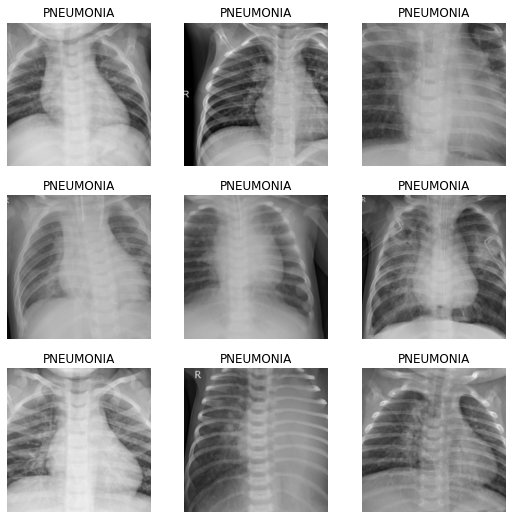

In [55]:
dls.show_batch()

In [56]:
print(dls.vocab)

(#2) ['NORMAL','PNEUMONIA']


In [57]:
print(dls.c)

2


In [62]:
learn = cnn_learner(dls, resnet34, metrics = [error_rate, accuracy])

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.0003981071640737355)

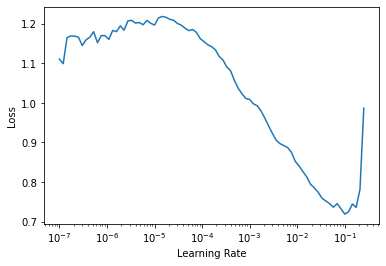

In [63]:
learn.lr_find()

In [64]:
learn.fit_one_cycle(1, lr_max = 1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.164906,0.085795,0.030316,0.969684,27:03


In [65]:
learn.unfreeze()

In [66]:
learn.fit_one_cycle(1, lr_max = 1e-4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.074303,0.052914,0.020495,0.979505,41:12


Model Interpretation

In [67]:
interpreter = ClassificationInterpretation.from_learner(learn)

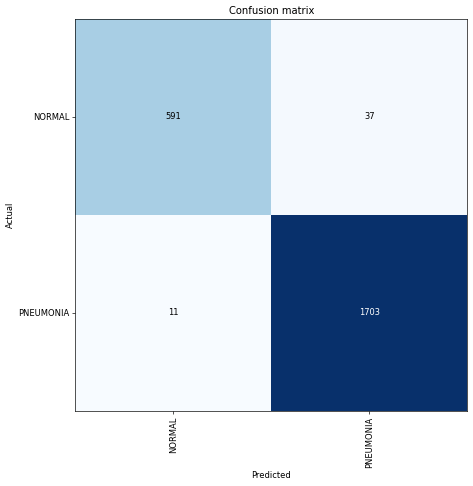

In [68]:
interpreter.plot_confusion_matrix(figsize = (12,8), dpi = 60)

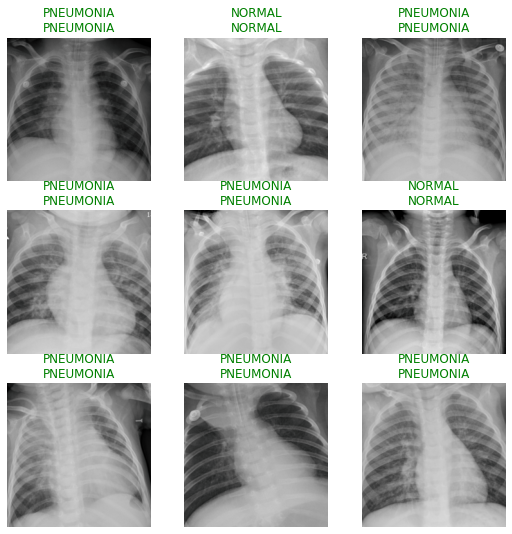

In [69]:
learn.show_results()